In [1]:
# COSTUMER SEGMENTATION PROJECT:-

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
df=pd.read_excel('marketing_campaign (1).xlsx')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
df.shape

(2240, 29)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [5]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
# Checking For null Values 
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
# Filling missing values in the 'Income' column with the mean of the column
df["Income"]= df["Income"].fillna(df['Income'].mean())

In [8]:
## Re-Checking Null Values or Missing values
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [9]:
mean_income_by_education=df.groupby('Education')['Income'].mean()
mean_income_by_education

Education
2n Cycle      47701.378099
Basic         20306.259259
Graduation    52715.755781
Master        52908.476370
PhD           56105.210405
Name: Income, dtype: float64

In [10]:
# defining a function to replace the missing values based on education columns 
def fill_missing_income(row):
    if pd.isnull(row['Income']):
        return mean_income_by_education[row['Education']]
    else:
        return row['Income']
    
# applying the function to fill missing values
df['Income']=df.apply(fill_missing_income, axis=1)

df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0


In [11]:
# Calculating age
from datetime import datetime

current_year = datetime.now().year

# Calculating age
df['Age'] = current_year - df['Year_Birth']

In [12]:
from datetime import datetime
current_date = datetime.now()
df['Ttl_yrs_in_comp'] = df['Dt_Customer'].apply(lambda dob: current_date.year - dob.year - ((current_date.month, current_date.day) < (dob.month, dob.day)))

<Axes: >

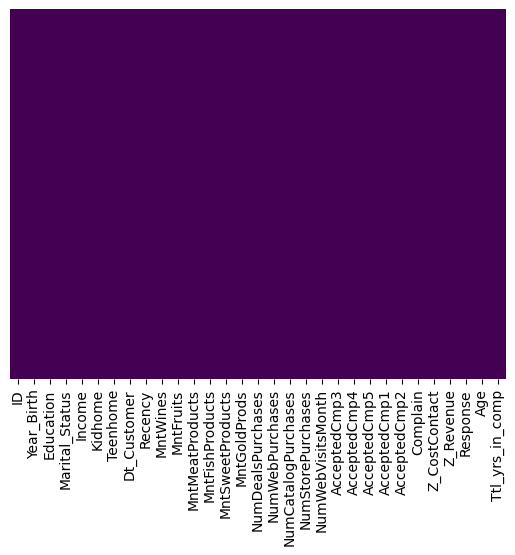

In [13]:
sns.heatmap(df.isnull(), cmap='viridis',yticklabels=False,cbar=False)

In [14]:
# Histogram of numerical features
modeling_df.hist(bins=30, figsize=(20, 15), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


NameError: name 'modeling_df' is not defined

In [ ]:
# Assuming the dataframe 'modeling_df' is already created and prepared

# Plotting the distribution of numerical columns
numerical_columns = modeling_df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(16, 20))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(6, 3, i)
    sns.histplot(modeling_df[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


In [ ]:
# Box plots for numerical columns
plt.figure(figsize=(16, 20))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(6, 3, i)
    sns.boxplot(x=modeling_df[column])
    plt.title(f'Box plot of {column}')
    plt.tight_layout()
    plt.show()

In [ ]:
# Select relevant categorical features for pie charts
categorical_features = ['Education', 'Marital_Status']

# Create pie charts for the selected categorical features
for feature in categorical_features:
    plt.figure(figsize=(8, 8))
    df[feature].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    plt.title(f'Pie Chart of {feature}', fontsize=20)
    plt.ylabel('')  # Hide the y-label
    plt.show()


In [ ]:
# Correlation matrix
correlation_matrix = modeling_df.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# The dataset has 2,240 entries with 29 columns, including information about customers' demographics, spending habits, and responses to marketing campaigns.
#The average customer was born around 1968, with an average age of 56 years. Income varies widely, averaging about 52,247 units, and the missing income values were filled with the median. 
#Most customers earn between 0 and 100,000 units, and they are mainly aged 50 to 70. 
#Spending is highest on wines and meat products, with notable outliers and variability in income and spending data.
#People who spend more on one product, like wines, also tend to spend more on other products, like meat.
#There is also a positive link between the number of web, catalog, and store purchases. Higher income is moderately linked to a positive response to marketing campaigns. 
#Additionally, there is a moderate positive correlation between accepting different marketing campaigns.


In [16]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Ttl_yrs_in_comp'],
      dtype='object')

In [17]:
# Correctly summing the specified columns
total_amount_spend = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# If you want to add this total amount as a new column in the original DataFrame
df['TotalAmountSpend'] = total_amount_spend

df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Ttl_yrs_in_comp,TotalAmountSpend
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,67,11,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,70,10,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,59,10,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,40,10,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,43,10,422


In [18]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Ttl_yrs_in_comp', 'TotalAmountSpend'],
      dtype='object')

In [22]:
#df.columns # removed 'Z_CostContact','Z_Revenue','Response','Complain'
df=df.drop(['ID', 'Year_Birth','Dt_Customer'],axis=1)

In [23]:
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Age,Ttl_yrs_in_comp,TotalAmountSpend
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,4,7,0,0,0,0,0,67,11,1617
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,2,5,0,0,0,0,0,70,10,27
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,10,4,0,0,0,0,0,59,10,776
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,4,6,0,0,0,0,0,40,10,53
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,6,5,0,0,0,0,0,43,10,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,0,1,46,709,43,182,42,...,4,5,0,0,0,0,0,57,11,1341
2236,PhD,Together,64014.0,2,1,56,406,0,30,0,...,5,7,0,0,0,1,0,78,10,444
2237,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,...,13,6,0,1,0,0,0,43,10,1241
2238,Master,Together,69245.0,0,1,8,428,30,214,80,...,10,3,0,0,0,0,0,68,10,843


In [24]:
# Save the modified DataFrame to a CSV file
df.to_csv('modified_data.csv', index=False)